In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [90]:
episode=pd.read_csv('../data/episode_info.csv')
wiki_info=pd.read_csv("../data/creators.csv")
rachel=pd.read_csv("../data/Rachel.csv")
monica=pd.read_csv("../data/Monica.csv")
phoebe=pd.read_csv("../data/Phoebe.csv")
ross=pd.read_csv("../data/Ross.csv")
joey=pd.read_csv("../data/Joey.csv")
chandler=pd.read_csv("../data/Chandler.csv")
alls=pd.read_csv("../data/All.csv")
guests=pd.read_csv("../data/guest_stars.csv")
scenes=pd.read_csv("../data/scenes.csv")
minors=pd.read_csv("../data/minors.csv")
songs_ph=pd.read_csv("../data/songs_phoebe.csv")

In [91]:
# monica=pd.read_csv("../data/Monica.csv")
#monica
songs_ph
# monica["line"][:2]

,line
0,Love is sweet as summer showers
1,Love is a wondrous work of art
2,"But your love, oh your love,"
3,Your love is like a giant pigeon
4,Crapping on my heart.
...,...
225,Bum bum bum
226,Don't take no for an answer!
227,Bum bum bum
228,Don't let love fly away!


In [92]:
import os
os.getcwd()  

# songs_ph["line"][0]

'/Users/aithi/Documents/GitHub/friends2-my/scripts'

In [93]:

import nltk
nltk.download('punkt') # one time 
import re


[nltk_data] Downloading package punkt to /Users/aithi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [94]:
from nltk.tokenize import sent_tokenize
sentences = []
for s in songs_ph["line"]:
    sentences.append(sent_tokenize(s))

sentences = [y for x in sentences for y in x] # flatten list
print(sentences[0:5])

['Love is sweet as summer showers', 'Love is a wondrous work of art', 'But your love, oh your love,', 'Your love is like a giant pigeon', 'Crapping on my heart.']


# Word Embeddings (Using Glove)

In [95]:
# !wget http://nlp.stanford.edu/data/glove.6B.zip
#!unzip glove*.zip
#Uncomment if not downloaded already ? I will try to do so in Google Collab

In [96]:
#Cleaning Sentences
clean_sentences = pd.Series(sentences).str.replace("[^a-zA-Z]", " ")


In [97]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /Users/aithi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [98]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [99]:
def remove_stopwords(sen):
    sen_new = " ".join([i for i in sen if i not in stop_words])
    return sen_new

In [100]:
# remove stopwords from the sentences

clean_sentences = [s.lower() for s in clean_sentences]
clean_sentences = [remove_stopwords(r.split()) for r in clean_sentences]



In [101]:
# Extract word vectors
word_embeddings = {}
f = open('glove.6B.100d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    word_embeddings[word] = coefs
f.close()

In [102]:
# let’s create vectors for our sentences. 

#the constituent words in a sentence and then take mean/average 
#of those vectors to arrive at a consolidated vector for the sentence
for i in clean_sentences[0:5]:
    for w in i.split():
        print(w)

love
sweet
summer
showers
love
wondrous
work
art
love
oh
love
love
like
giant
pigeon
crapping
heart


In [110]:
sentence_vectors = []
for i in clean_sentences:
    if len(i) != 0:
        #print('I am here')
        v = sum([word_embeddings.get(w, np.zeros((100,))) for w in i.split()])/(len(i.split())+0.001)
    else:
        v = np.zeros((100,))
    sentence_vectors.append(v)
# print(sentences[0])
# print(clean_sentences[0])
# print(sentence_vectors[0])

In [104]:
import pandas as pd
#import gensim
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# import xgboost as xgb

In [6]:
%history -g
#awesome

 2/1: import tensorflow
 2/2: pip --upgrade tensorflow
 2/3: import tensorflow as tf
 2/4:
import tensorflow as tf
mnist= tf.keras.datasets.mnist
 2/5:
import tensorflow as tf
mnist= tf.keras.datasets.mnist 
(x_train,y_train), (x_test,y_test)= mninst.load_data()
 2/6:
import tensorflow as tf
mnist = tf.keras.datasets.mnist 
(x_train,y_train), (x_test,y_test)= mninst.load_data()
 2/7:
import tensorflow as tf
mnist = tf.keras.datasets.mnist 
(x_train,y_train), (x_test,y_test)= mninst.load_data()
 2/8: tensorflow -V
 2/9: tensorflow --version
2/10: tf.version
2/11: tf._version
2/12: tf._version_
2/13: tf._version_
2/14: tf._version_
2/15: tf.__version__
2/16: keras.__version__
2/17: import keras
2/18: tf.keras
2/19: tf.keras.__version__
2/20: mnist=tf.keras.datasets.mnist
2/21:  (x_train,y_train),(x_test, y_test)=mnist.load_data()
2/22: import matplotlib.pyplot as plt
2/23:
plt.imshow(x_train[0], cmap=plt.c.binary)
plt.show()
2/24:
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()
2/2

26/108:
fig=plt.figure()
# plt1=plt.scatter(range(len(y1)),y1);
plt2=plt.scatter(range(len(y_o2)),y_o2);
plt3=plt.scatter(range(len(y_03)),y_o3);
# fig.savefig('2_3_img.png')
#np.save('fig23.png',plt1)
26/109:
y1=u[:,1].transpose().dot(X); y1.shape
## y1 denotes the projection of the X along the first 
## principal component (dirn of max variance)


y_o2=u_o2[:,1].transpose().dot(X_o2); y_o2.shape
y_o3=u_o3[:,1].transpose().dot(X_o3); y_o3.shape
26/110:
fig=plt.figure()
# plt1=plt.scatter(range(len(y1)),y1);
plt2=plt.scatter(range(len(y_o2)),y_o2);
plt3=plt.scatter(range(len(y_03)),y_o3);
# fig.savefig('2_3_img.png')
#np.save('fig23.png',plt1)
26/111:
fig=plt.figure()
# plt1=plt.scatter(range(len(y1)),y1);
plt2=plt.scatter(range(len(y_o2)),y_o2);
# plt3=plt.scatter(range(len(y_03)),y_o3);
# fig.savefig('2_3_img.png')
#np.save('fig23.png',plt1)
26/112:
y1=u[:,1].transpose().dot(X); y1.shape
## y1 denotes the projection of the X along the first 
## principal component (dirn of max varian

51/19:
class Linear(nn.Module):
  def __init__(self, dim_in, dim_out, device):
    super(Linear, self).__init__()
    
    self.weights = nn.Parameter(torch.randn([dim_out, dim_in], dtype=torch.float32, device=device)*0.1, requires_grad=True)
    
    self.bias = nn.Parameter(torch.zeros([dim_out], dtype=torch.float32, device=device), requires_grad=True)
    self.dim_out = dim_out
    self.device = device
    
    ## Device=GPU/CPU ??
    
  def linear_forward(self, X):
    """
    inputs:
     X: tensor of shape (batch_size, *, dim_in)
    outputs:
     Y: tensor of shape (batch_size, *, dim_out)
    """
    
    ###  Star your code here ### 
    Y = X.matmul((torch.transpose(self.weights))) + torch.ones(X.shape[0]).matmul(torch.transpose(self.bias))
    
    Y=F.linear(X, self.weights, self.bias)
    ###  End of the code ###
    return Y
  
  def forward(self, X):
    return self.linear_forward(X)
51/20:
# correctness checking
torch.random.manual_seed(0)
x = torch.arange(50).view(5, 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



print(HNE(W,x1_vec))
print(HNE(W,x2_vec))
167/125:
def asynchronous_update(x_as):
    old_x_start=x_as
    x_new=[]
    #print(len(x_as))
    for ctr in range(len(x_as)):
        el=x_as[ctr]
        
        #a_el=((W.T).dot(x_as)) [ctr] # choose the ith one
        
        #Routine for this can be more explict
        #Taking care of the previous updates
        a_el=0
        j=0
        while j<ctr:
            a_el+=W[ctr,j]*x_new[j]
            j+=1
        while j>=ctr and j<len(x_as):
            a_el+=W[ctr,j]*x_as[j]
            j+=1
        
        #print(a_el)
        # Doing a_i=\sum_j(W_ij x_j)
        flip_count=0
        if a_el>=0:
            #print(el)
            x_new.append(1)
            flip_count+=1
            #if el<0:
                #print('gonna flip the mf', x_as[ctr])
                #print("I am here-ctr", ctr)
                #update el by el thus changing original x_start
                #print(x_as[ctr])
            
        if a_el<0:
            

#lines said in script
monicas_lines=np.array([len(monica.loc[(monica.season==episode.iloc[x].season) & (monica.episode==episode.iloc[x].episode)]) for x in range(0,len(episode))])
rachel_lines=np.array([len(rachel.loc[(rachel.season==episode.iloc[x].season) & (rachel.episode==episode.iloc[x].episode)]) for x in range(0,len(episode))])
ross_lines=np.array([len(ross.loc[(ross.season==episode.iloc[x].season) & (ross.episode==episode.iloc[x].episode)]) for x in range(0,len(episode))])
phoebe_lines=np.array([len(phoebe.loc[(phoebe.season==episode.iloc[x].season) & (phoebe.episode==episode.iloc[x].episode)]) for x in range(0,len(episode))])
joey_lines=np.array([len(joey.loc[(joey.season==episode.iloc[x].season) & (joey.episode==episode.iloc[x].episode)]) for x in range(0,len(episode))])
chandler_lines=np.array([len(chandler.loc[(chandler.season==episode.iloc[x].season) & (chandler.episode==episode.iloc[x].episode)]) for x in range(0,len(episode))])
all_lines=np.array([len(alls.loc[(alls.seas

226/227: # sim_mat1
226/228: sort_l=np.argsort(list(sim_mat1.reshape(sim_mat1.shape[1])))
226/229: sim_mat1.shape
226/230: # sort_l
226/231: sim_list=list(sim_mat1.reshape(sim_mat1.shape[1]))
226/232: max_pos=sim_list.index(max(sim_list))
226/233: print(max_pos)
226/234: sum_table=episode_info["short_summary"]
226/235: sum_table[max_pos]
226/236: sum_table[sort_l[-1]]
226/237: sum_table[sort_l[-2]]
226/238: sum_table[sort_l[-3]]
227/27:
from nltk.tokenize import sent_tokenize
sentences = []
for s in monica["line"]:
    sentences.append(sent_tokenize(s))

sentences = [y for x in sentences for y in x] # flatten list
print(sentences[0:5])
229/1: pwd
226/239:
#"Input your sentece"
sentence_query=["Phoebe sings "]
clean_sentence_query = pd.Series(sentence_query).str.replace("[^a-zA-Z]", " ")

clean_sentence_query = [s.lower() for s in clean_sentence_query]
clean_sentence_query = [remove_stopwords(r.split()) for r in clean_sentence_query]
226/240:
sentence_vector_query = []

for i in clean_s

In [117]:
from nltk.tokenize import word_tokenize
# Tokenize the string into words
words_filtered=[]
vector_list=[]
for i in clean_sentences:
    for w in i.split():
        words_filtered.append(w)
        
        vector_list.append(word_embeddings.get(w, np.zeros((100,)))  )
        #print(w)
                
# Zip the words together with their vector representations
word_vec_zip = zip(words_filtered, vector_list)

# Cast to a dict so we can turn it into a DataFrame
word_vec_dict = dict(word_vec_zip)

In [118]:
len(words_filtered)

793

In [119]:
df = pd.DataFrame.from_dict(word_vec_dict, orient='index')


In [120]:
from sklearn.manifold import TSNE

#Initialize t-SNE
tsne = TSNE(n_components = 2, init = 'random', random_state = 10, perplexity = 40)

# Use only 400 rows to shorten processing time
tsne_df = tsne.fit_transform(df[:400])


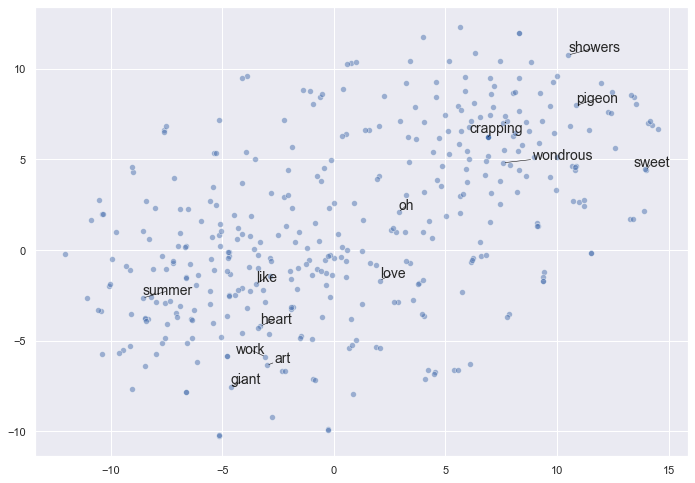

In [121]:
sns.set()
# Initialize figure
fig, ax = plt.subplots(figsize = (11.7, 8.27))
sns.scatterplot(tsne_df[:, 0], tsne_df[:, 1], alpha = 0.5)

# Import adjustText, initialize list of texts
from adjustText import adjust_text
texts = []
words_to_plot = list(np.arange(0, 13, 1))

# Append words to list
for word in words_to_plot:
    texts.append(plt.text(tsne_df[word, 0], tsne_df[word, 1], df.index[word], fontsize = 14))
    
# Plot text using adjust_text (because overlapping text is hard to read)
adjust_text(texts, force_points = 0.4, force_text = 0.4, 
            expand_points = (2,1), expand_text = (1,2),
            arrowprops = dict(arrowstyle = "-", color = 'black', lw = 0.5))

plt.show()